## Исследовательский анализ данных трафика и базовые маркетинговые метрики на по результам рекламных кампаний с разбивкой по:
- по регионам
- платфорамам
- рекламных каналам

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Загружаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

**Визуальное знакомство с данными**

In [3]:
display(visits)
display(orders)
display(costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


- **Знакомимся с общей информаций по базам**

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [7]:
print('visits: ', visits.duplicated().mean())
print('orders: ', orders.duplicated().mean())
print('costs: ', costs.duplicated().mean())

visits:  0.0
orders:  0.0
costs:  0.0


- **Приведем данные в удобный для работы вид и даты в формат datetime**

In [8]:
visits.rename(str.lower, axis='columns',inplace=True)
orders.rename(str.lower, axis='columns',inplace=True)
costs.rename(str.lower, axis='columns',inplace = True)
visits.rename(columns = {'session start':'session_start', 'session end':'session_end'},inplace=True)
visits.rename(columns = {'user id': 'user_id'}, inplace=True)
orders.rename(columns = {'event dt':'event_dt'}, inplace=True)
orders.rename(columns  = {'user id':'user_id'},inplace=True)

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [10]:
print('Regions: ', *visits['region'].unique())
print('Channels: ', *visits['channel'].unique())
print('Devices: ', *visits['device'].unique())
print('Start date: ', visits['session_start'].min())
print('End date: ', visits['session_start'].max())

Regions:  United States UK France Germany
Channels:  organic TipTop RocketSuperAds YRabbit FaceBoom MediaTornado AdNonSense LeapBob WahooNetBanner OppleCreativeMedia lambdaMediaAds
Devices:  iPhone Mac Android PC
Start date:  2019-05-01 00:00:41
End date:  2019-10-31 23:59:23


In [11]:
visits.groupby(['user_id','session_start']).agg({'user_id':'nunique'})

user_id
user_id      session_start               
599326       2019-05-07 20:58:57        1
             2019-05-08 06:00:42        1
             2019-05-09 07:33:16        1
4919697      2019-07-09 12:46:07        1
             2019-07-10 22:27:24        1
...                                   ...
999976332130 2019-07-23 02:57:06        1
999979924135 2019-09-28 21:28:09        1
             2019-10-04 07:37:05        1
999999563947 2019-10-18 19:57:25        1
             2019-10-20 04:10:34        1

[309901 rows x 1 columns]

### Вывод

1. Для анализа предоставлены данные по активностям клиениентов за 6 месяцев с 1 мая до 31 октября 2019 года
   с разбивкой по:
- 3 регионам: United States UK France Germany
- 11 каналам: organic TipTop RocketSuperAds YRabbit FaceBoom MediaTornado AdNonSense LeapBob WahooNetBanner OppleCreativeMedia lambdaMediaAds
- 3 типам платформ: iPhone Mac Android PC 
- Пропусков и дубликатов в предоставленных базах нет
- В сырых данных столбцы с датой и временем имеют тип данных object

2. Данные по затратам на рекламу с разбивкой по каналам

3. Данные по доходу с разбивкой по клиентам


### Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

- **функция get_prfiles()**

In [12]:
def get_profiles(visits, orders):
    profiles = visits.sort_values(['user_id','session_start'])\
    .groupby('user_id').agg({'session_start':'first',
                             'region':'first',
                             'device':'first',
                             'channel':'first'})\
    .rename(columns={'session_start':'first_ts'})\
    .reset_index()
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    return profiles

In [13]:
profiles = get_profiles(visits, orders)
profiles

,user_id,first_ts,region,device,channel,dt,month,payer
0,599326,2019-05-07 20:58:57,United States,Mac,FaceBoom,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,United States,iPhone,FaceBoom,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,France,iPhone,organic,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,Germany,PC,AdNonSense,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,United States,iPhone,YRabbit,2019-10-02,2019-10-01,False
...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,United States,iPhone,TipTop,2019-09-28,2019-09-01,False
150004,999975439887,2019-10-21 00:35:17,UK,PC,organic,2019-10-21,2019-10-01,False
150005,999976332130,2019-07-23 02:57:06,United States,iPhone,TipTop,2019-07-23,2019-07-01,False
150006,999979924135,2019-09-28 21:28:09,United States,PC,MediaTornado,2019-09-28,2019-09-01,False


- **функция get_retention()**

In [14]:
def get_retention(profiles, vistis, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    dimensions = ['payer'] + dimensions
    
    last_suitable_acquisition_date = observation_date
    
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
        
    result_raw = profiles.query('dt<= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(visits[['user_id', 'session_start']], how='left', on='user_id')

    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    def group_by_dimensions(df, dims, horizon_days):      
        result = df.pivot_table(index= dims, columns='lifetime', \
                                                values='user_id', aggfunc = 'nunique').fillna(0)
        cohort_size = df.groupby(dims).agg({'user_id':'nunique'}).rename(columns={'user_id':'cohort_size'})
        result = cohort_size.merge(result, how='left', on=dims)
        result = result.div(result['cohort_size'], axis=0)
        result  = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_size
        return result
    
    retention  = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    retention_in_time = group_by_dimensions(result_raw, dimensions+['dt'], horizon_days)

    return result_raw, retention, retention_in_time

- проверяем работу фунции

In [15]:
observation_date = datetime(2019, 5, 15).date()
horizon_days = 7

result_raw, retention, retention_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['channel'])
retention_in_time

cohort_size    0         1         2         3  \
payer channel    dt                                                           
False AdNonSense 2019-05-01           36  1.0  0.222222  0.000000  0.111111   
                 2019-05-02           36  1.0  0.111111  0.083333  0.027778   
                 2019-05-03           42  1.0  0.142857  0.095238  0.047619   
                 2019-05-04           45  1.0  0.133333  0.066667  0.044444   
                 2019-05-05           31  1.0  0.322581  0.064516  0.064516   
...                                  ...  ...       ...       ...       ...   
True  organic    2019-05-05            9  1.0  0.555556  0.444444  0.333333   
                 2019-05-06           20  1.0  0.550000  0.400000  0.350000   
                 2019-05-07           10  1.0  0.800000  0.500000  0.600000   
                 2019-05-08            7  1.0  0.428571  0.571429  0.428571   
                 2019-05-09           10  1.0  0.800000  0.300000  0.300000   

                                    4         5         6  
payer channel    dt                                        
False AdNonSense 2019-05-01  0.027778  0.000000  0.027778  
                 2019-05-02  0.027778  0.000000  0.055556  
                 2019-05-03  0.023810  0.023810  0.047619  
                 2019-05-04  0.022222  0.022222  0.000000  
                 2019-05-05  0.032258  0.000000  0.032258  
...                               ...       ...       ...  
True  organic    2019-05-05  0.444444  0.333333  0.000000  
                 2019-05-06  0.350000  0.250000  0.450000  
                 2019-05-07  0.300000  0.400000  0.400000  
                 2019-05-08  0.571429  0.428571  0.428571  
                 2019-05-09  0.500000  0.200000  0.300000  

[181 rows x 8 columns]

- **функция get_conversion()**

In [16]:
def get_conversion(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    
    last_suitable_acquisition_date = observation_date
    
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
        
    result_raw = profiles.query('dt<= @last_suitable_acquisition_date')
    first_purchase = orders.sort_values(['user_id','event_dt']).groupby('user_id')\
                                            .agg({'event_dt':'first'}).reset_index()

    result_raw = result_raw.merge(first_purchase[['user_id', 'event_dt']], how='left', on='user_id')

    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    def group_by_dimensions(df, dims, horizon_days):  
        
        result = df.pivot_table(index=dims, columns='lifetime', \
                                                values='user_id', aggfunc = 'nunique').fillna(0)
        result = result.cumsum(axis=1)
        cohort_size = df.groupby(dims).agg({'user_id':'nunique'})\
                                                .rename(columns={'user_id':'cohort_size'})
        
        result = cohort_size.merge(result, how='left', on=dims)
        result = result.div(result['cohort_size'], axis=0)
        result  = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_size
        return result
    
    result_grouped  = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    if 'cohort' in dimensions:
        dimensions = []
        
    result_in_time = group_by_dimensions(result_raw, dimensions+['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time

- проверяем работу фунции

In [17]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False)
result_in_time.head()

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01          207  0.038647  0.043478  0.043478  0.043478   
        2019-05-02          177  0.016949  0.022599  0.028249  0.028249   
        2019-05-03          204  0.039216  0.044118  0.053922  0.053922   
        2019-05-04          232  0.047414  0.051724  0.056034  0.056034   
        2019-05-05          235  0.025532  0.025532  0.025532  0.025532   

                         4.0       5.0       6.0  
device  dt                                        
Android 2019-05-01  0.048309  0.048309  0.048309  
        2019-05-02  0.028249  0.028249  0.028249  
        2019-05-03  0.053922  0.053922  0.053922  
        2019-05-04  0.060345  0.060345  0.064655  
        2019-05-05  0.025532  0.025532  0.025532

- **фунция get_ltv()**

In [18]:
def get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    
    
    last_suitable_acquisition_date = observation_date
    
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
        
    result_raw = profiles.query('dt<= @last_suitable_acquisition_date')
    

    result_raw = result_raw.merge(orders, how='left', on='user_id')

    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    def group_by_dimensions(df, dims, horizon_days):  
        
        result = df.pivot_table(index=dims, columns='lifetime', \
                                                values='revenue', aggfunc='sum').fillna(0)
        result = result.cumsum(axis=1)
        cohort_size = df.groupby(dims).agg({'user_id':'nunique'})\
                                                .rename(columns={'user_id':'cohort_size'})
        
        result = cohort_size.merge(result, how='left', on=dims)
        result = result.div(result['cohort_size'], axis=0)
        result  = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_size
        return result
    
    result_grouped  = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    if 'cohort' in dimensions:
        dimensions = []
        
    result_in_time = group_by_dimensions(result_raw, dimensions+['dt'], horizon_days)

    return result_raw, result_grouped, result_in_time

- проверяем работу фунции

In [65]:
result_raw, result_grouped, result_in_time = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=[], ignore_horizon=False)
result_in_time
#result_grouped

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
dt,,,,,,,,,,,,,,,
2019-05-01,909,0.160297,0.215193,0.260209,0.294246,0.316205,0.316205,0.327184,0.338163,0.382079,0.426029,0.469945,0.502882,0.508372,0.524840
2019-05-02,758,0.157995,0.302942,0.335858,0.381939,0.408272,0.441201,0.454367,0.493865,0.526781,0.546530,0.572863,0.579446,0.592612,0.612361
2019-05-03,849,0.165748,0.249211,0.326796,0.379694,0.503227,0.550259,0.556137,0.562014,0.591402,0.620789,0.632544,0.667809,0.691319,0.708952
2019-05-04,1015,0.232138,0.286217,0.315714,0.359970,0.459369,0.518365,0.528197,0.557695,0.582276,0.601941,0.616690,0.656020,0.656020,0.690433
2019-05-05,970,0.140969,0.229546,0.244979,0.265557,0.291278,0.317000,0.332433,0.347866,0.353010,0.363299,0.389021,0.399309,0.419887,0.425031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-15,674,0.266528,0.318353,0.362774,0.414614,0.453116,0.467923,0.490134,0.504941,0.512344,0.534555,0.564169,0.586380,0.601187,0.615994
2019-10-16,656,0.190183,0.228216,0.282988,0.328628,0.328628,0.359055,0.398613,0.413826,0.453399,0.461006,0.483826,0.491433,0.514253,0.529466
2019-10-17,703,0.235704,0.278293,0.399090,0.413286,0.420384,0.434580,0.441679,0.462973,0.484267,0.519758,0.541053,0.548151,0.577966,0.577966


- **фукция filter_data()**

In [20]:
observation_date = datetime(2019, 8, 15).date()
horizon_days = 7

result_raw, retention, retention_in_time = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'])
retention_in_time.head()

cohort_size    0         1         2         3  \
payer device  dt                                                           
False Android 2019-05-01          195  1.0  0.194872  0.076923  0.051282   
              2019-05-02          171  1.0  0.210526  0.122807  0.046784   
              2019-05-03          193  1.0  0.212435  0.082902  0.062176   
              2019-05-04          217  1.0  0.156682  0.110599  0.073733   
              2019-05-05          229  1.0  0.165939  0.104803  0.052402   

                                 4         5         6  
payer device  dt                                        
False Android 2019-05-01  0.025641  0.020513  0.010256  
              2019-05-02  0.029240  0.017544  0.023392  
              2019-05-03  0.031088  0.025907  0.010363  
              2019-05-04  0.013825  0.018433  0.009217  
              2019-05-05  0.026201  0.021834  0.026201

In [21]:
def filter_data(df, window):
    return df.rolling(window).mean()

In [22]:
filter_data(retention_in_time, 3)# проверяем работу функции

cohort_size    0         1         2         3  \
payer device  dt                                                           
False Android 2019-05-01          NaN  NaN       NaN       NaN       NaN   
              2019-05-02          NaN  NaN       NaN       NaN       NaN   
              2019-05-03   186.333333  1.0  0.205944  0.094211  0.053414   
              2019-05-04   193.666667  1.0  0.193215  0.105436  0.060898   
              2019-05-05   213.000000  1.0  0.178352  0.099435  0.062770   
...                               ...  ...       ...       ...       ...   
True  iPhone  2019-08-05    20.666667  1.0  0.263258  0.231061  0.207702   
              2019-08-06    20.666667  1.0  0.304924  0.258838  0.249369   
              2019-08-07    19.666667  1.0  0.299342  0.293129  0.191155   
              2019-08-08    19.666667  1.0  0.320175  0.397295  0.211988   
              2019-08-09    18.333333  1.0  0.428509  0.386184  0.167544   

                                 4         5         6  
payer device  dt                                        
False Android 2019-05-01       NaN       NaN       NaN  
              2019-05-02       NaN       NaN       NaN  
              2019-05-03  0.028656  0.021321  0.014670  
              2019-05-04  0.024718  0.020628  0.014324  
              2019-05-05  0.023705  0.022058  0.015260  
...                            ...       ...       ...  
True  iPhone  2019-08-05  0.157828  0.092803  0.120581  
              2019-08-06  0.199495  0.120581  0.120581  
              2019-08-07  0.191520  0.142909  0.142909  
              2019-08-08  0.233187  0.163743  0.142909  
              2019-08-09  0.235965  0.210965  0.181798  

[808 rows x 8 columns]

- **функция plot_retention()**

In [23]:
def plot_retention(retention, retention_in_time, horizon, window=1):
    
    plt.figure(figsize=(20,15))
    
    retention = retention.drop(columns=['cohort_size', 0])
    
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort','payer'])
    
    ax1 = plt.subplot(2,2,1)
    
    retention.query('payer==True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Payers retention')
    
    ax2 = plt.subplot(2,2,2, sharey=ax1)
    retention.query('payer==False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Non payers retention')
    
    columns = [name for name in retention_in_time.index.names if name not in ['dt','payer']]
    
    ax3 = plt.subplot(2,2,3)
    retention_in_time.query('payer==True').pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')\
                                                                         .rolling(window).mean()\
                                                                         .plot(grid=True, ax=ax3)

    plt.xlabel('Date of payer attraction')
    plt.title(f'Payer attraction dynamic on {horizon} day')
    
    ax4 = plt.subplot(2,2,4, sharey=ax3)
    retention_in_time.query('payer==False').pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')\
                                                                         .rolling(window).mean()\
                                                                         .plot(grid=True, ax=ax4)
 
    plt.xlabel('Date of non payer attraction')
    plt.title(f'Non payer attraction dynamic on {horizon} day')  
    plt.tight_layout()
    plt.show()
    

- проверяем работу фунции

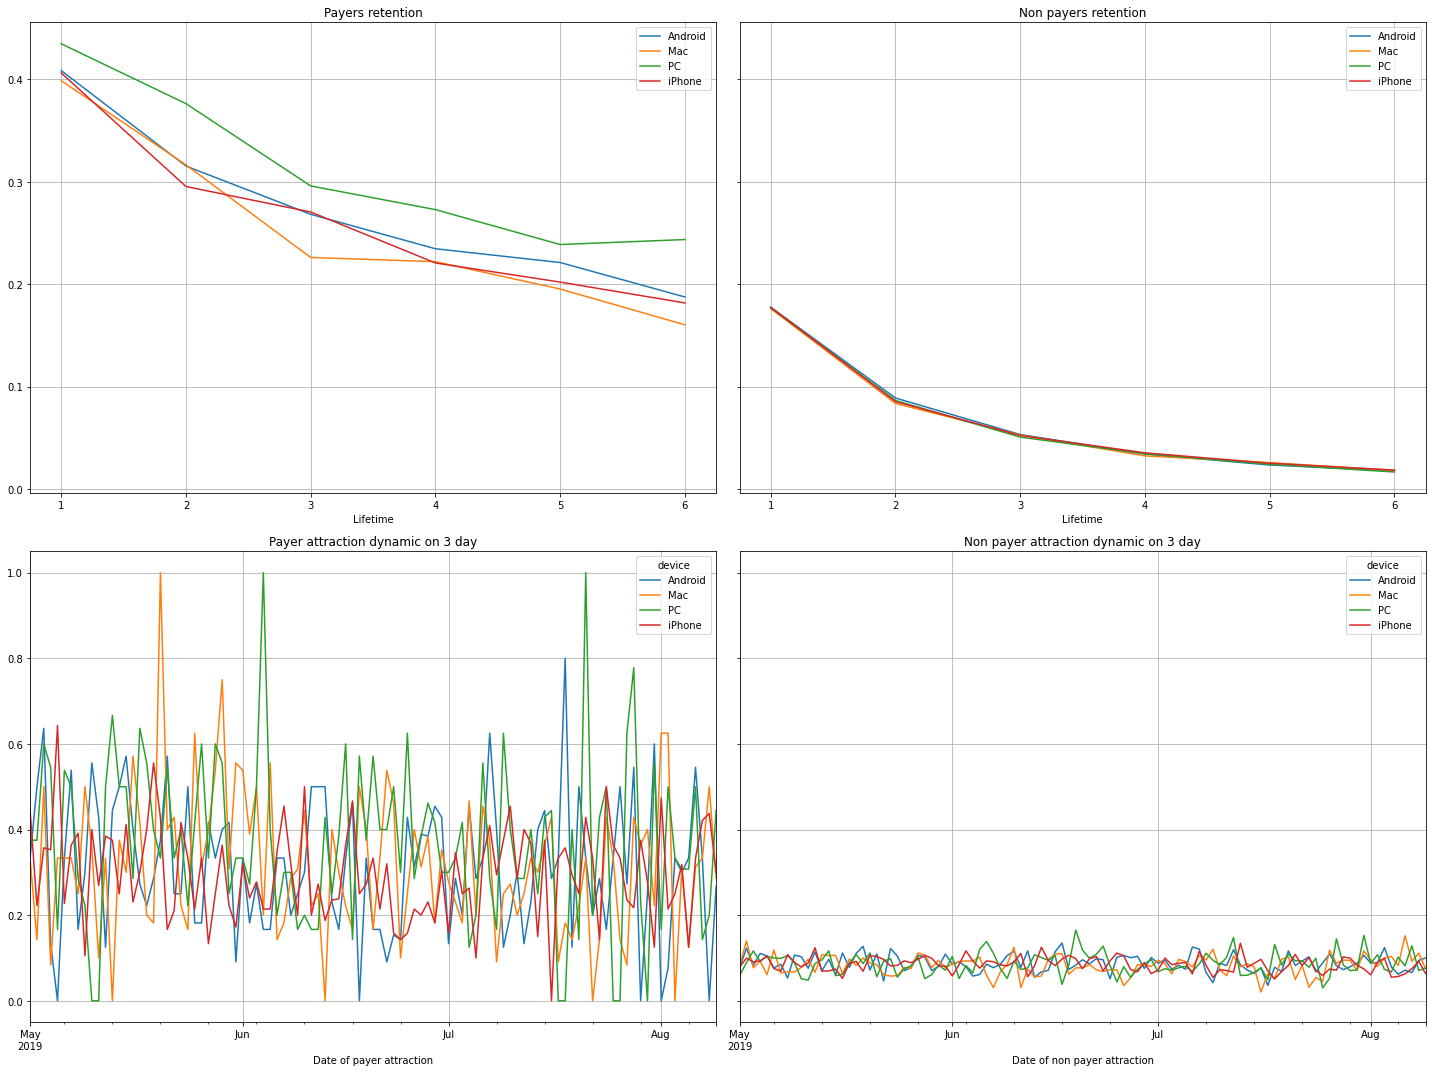

In [24]:
plot_retention(retention, retention_in_time,3)

- **функция plot_conversion()**

In [25]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False)
result_in_time.head()
result_in_time

cohort_size       0.0       1.0       2.0       3.0  \
device  dt                                                                
Android 2019-05-01          207  0.038647  0.043478  0.043478  0.043478   
        2019-05-02          177  0.016949  0.022599  0.028249  0.028249   
        2019-05-03          204  0.039216  0.044118  0.053922  0.053922   
        2019-05-04          232  0.047414  0.051724  0.056034  0.056034   
        2019-05-05          235  0.025532  0.025532  0.025532  0.025532   
...                         ...       ...       ...       ...       ...   
iPhone  2019-08-05          298  0.033557  0.040268  0.040268  0.040268   
        2019-08-06          278  0.057554  0.061151  0.064748  0.068345   
        2019-08-07          272  0.051471  0.055147  0.058824  0.058824   
        2019-08-08          254  0.039370  0.047244  0.059055  0.059055   
        2019-08-09          304  0.036184  0.046053  0.055921  0.055921   

                         4.0       5.0       6.0  
device  dt                                        
Android 2019-05-01  0.048309  0.048309  0.048309  
        2019-05-02  0.028249  0.028249  0.028249  
        2019-05-03  0.053922  0.053922  0.053922  
        2019-05-04  0.060345  0.060345  0.064655  
        2019-05-05  0.025532  0.025532  0.025532  
...                      ...       ...       ...  
iPhone  2019-08-05  0.043624  0.043624  0.043624  
        2019-08-06  0.071942  0.071942  0.071942  
        2019-08-07  0.058824  0.058824  0.058824  
        2019-08-08  0.059055  0.059055  0.059055  
        2019-08-09  0.059211  0.062500  0.062500  

[404 rows x 8 columns]

nlevels = res.index.nlevels
if nlevels < 1:
    ndims = len(nlevels)
    ind = res.index.get_level_values

In [26]:
def plot_conversion(profiles,\
                    orders,\
                    observation_date,\
                    horizon_days,\
                    dimensions=[],\
                    window=1,\
                    ignore_horizon=False):

    result_raw, result_grouped, result_in_time = get_conversion(profiles,\
                                                                orders,\
                                                                observation_date,\
                                                                horizon_days,\
                                                                dimensions= dimensions,\
                                                                ignore_horizon=False)
    
    result = result_grouped.drop(columns=['cohort_size'])
    
    d = horizon_days - 1
    result_timed = result_in_time[d].reset_index().pivot_table(index='dt',\
                                                                columns=dimensions,\
                                                                values=d).rolling(window).mean()                      
                                                                          
    
    plt.figure(figsize= (12,5))
    
    ax1 = plt.subplot(1,2,1)
    result.T.plot(grid=True,ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Conversion by dims')
    
    ax2 = plt.subplot(1,2,2)
    result_timed.plot(grid=True, ax=ax2)
    plt.legend()
    plt.title(f'Конверсия на {d} день с окном сглаживания {window}')
    
    plt.show();

- проверяем работу фунции

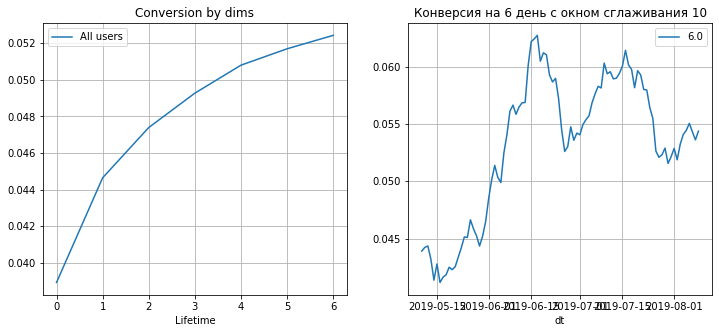

In [27]:
plot_conversion(profiles,\
                    orders,\
                    observation_date,\
                    horizon_days,\
                    dimensions=[],\
                    window=10,\
                    ignore_horizon=False)

In [28]:
(datetime(2019,5,20).date() - profiles['dt'].min()).days

19

- **функция plot_ltv()**

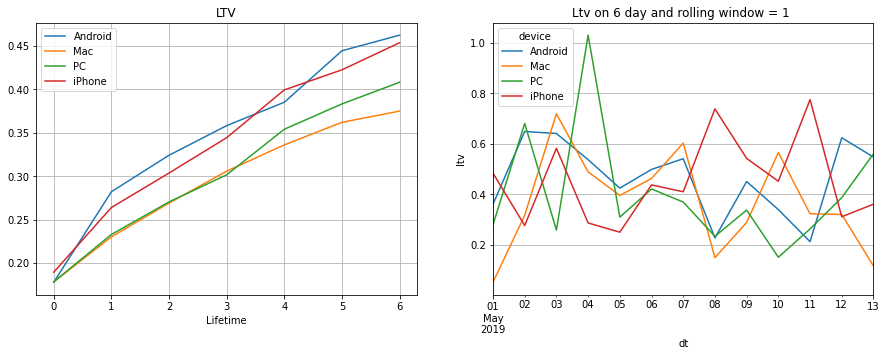

In [29]:
def plot_ltv(profiles, orders, observation_date, horizon_days, dimensions=['region'],window = 1, ignore_horizon=False):  
    
    result_raw, result_grouped, result_in_time = get_ltv(profiles, orders,\
                                                                observation_date,\
                                                                horizon_days, \
                                                                dimensions=dimensions,\
                                                                ignore_horizon=False)
    plt.figure(figsize=(15,5)) 
    
    ax1 = plt.subplot(1,2,1)
    result_grouped.drop(columns=['cohort_size']).T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')
    
    ax2 = plt.subplot(1,2,2)
    d = horizon_days - 1
    res = result_in_time.drop(columns=['cohort_size'])[d]
    res.reset_index().pivot_table(index='dt', columns=dimensions,values=d).rolling(window).mean().plot(grid=True, ax=ax2)
    plt.ylabel('ltv')
    plt.title(f'Ltv on {d} day and rolling window = {window} ')
    plt.show()
    
    plt.show()
    
observation_date = datetime(2019,5,19).date()
horizon_days = 7
plot_ltv(profiles, orders, observation_date, horizon_days, dimensions=['device'], ignore_horizon=False)

- **расчитываем CAC**

  для этого затраты на рекламу поделим на количество привлечённых клиентов

 - общая таблица, в которой есть информация по дате, каналу рекламы, размеру когорты, рекламным затратам, CAC прибыли по дням

In [30]:
orders.rename(columns={'event_dt':'first_ts'})

,user_id,first_ts,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [31]:
def profiles_cac(visits, costs, orders):
    
    profiles = get_profiles(visits, orders)
    profiles['dt'] = pd.to_datetime(profiles['dt'])

    result_raw = profiles.groupby(['dt','channel'])\
                                 .agg({'user_id':'nunique'})\
                                 .rename(columns={'user_id':'cohort_size'})

    ad_costs = costs.merge(result_raw, how='left', on=['dt','channel'])
    ad_costs['acquisition_costs'] = ad_costs['costs']/ad_costs['cohort_size']
    result = profiles.merge(ad_costs[['dt','channel', 'acquisition_costs']], how='left',on=['dt','channel'])
    result['acquisition_costs'] = result['acquisition_costs'].fillna(0)
    #ad_orders = orders.rename(columns={'event_dt':'first_ts'})
    #result = result.merge(ad_orders['revenue'], how='left', on=['user_id','first_ts'])
    return result

In [32]:
cac = profiles_cac(visits, costs, orders)
cac
#roi.groupby('region').agg({'acquisition_costs':'sum'})

,user_id,first_ts,region,device,channel,dt,month,payer,acquisition_costs
0,599326,2019-05-07 20:58:57,United States,Mac,FaceBoom,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,United States,iPhone,FaceBoom,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,France,iPhone,organic,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,Germany,PC,AdNonSense,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,United States,iPhone,YRabbit,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,United States,iPhone,TipTop,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,UK,PC,organic,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,United States,iPhone,TipTop,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,United States,PC,MediaTornado,2019-09-28,2019-09-01,False,0.205714


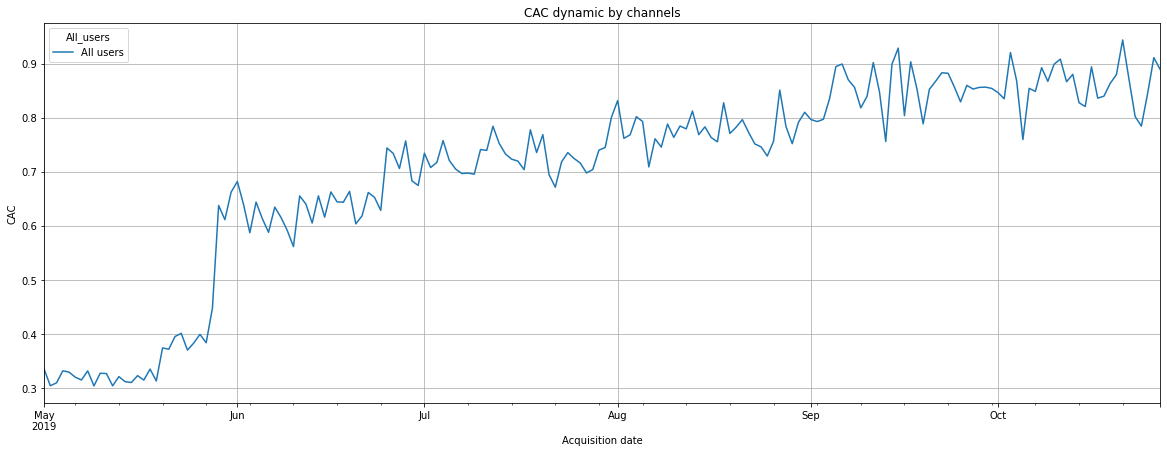

In [33]:
def plot_cac(visits, costs, orders, window=1, dimensions=[]):
    cac = profiles_cac(visits, costs, orders)
    cac['All_users'] = 'All users'
    if len(dimensions)== 0:
        dimensions = ['All_users']
        
    cac.pivot_table(index='dt', columns=dimensions, values='acquisition_costs', aggfunc='mean')\
                                                                .rolling(window).mean()\
                                                                .plot(grid=True, figsize=(20,7))
    plt.xlabel('Acquisition date')
    plt.ylabel('CAC')
    plt.title('CAC dynamic by channels')
    plt.show()
    
plot_cac(visits, costs, orders)    

In [34]:
observation_date = datetime(2019,5,10).date()
horizon_days = 8
profiles = get_profiles(visits, orders)
profiles['dt'] = pd.to_datetime(profiles['dt'])

result_raw = profiles.groupby(['dt','channel'])\
                             .agg({'user_id':'nunique'})\
                             .rename(columns={'user_id':'cohort_size'})

costs_raw = costs.groupby(['dt','channel']).agg({'costs':'sum'})
result = result_raw.merge(costs_raw['costs'] , left_index=True, right_index=True)
result['CAC'] = round(result['costs']/result['cohort_size'],3)
res_l = profiles.merge(orders, how ='left', on='user_id')
res_l['lifetime'] = (res_l['event_dt'] - res_l['first_ts']).dt.days
res_raw = res_l.pivot_table(index=['dt','channel'], columns='lifetime', values='revenue', aggfunc='sum')
total_table = result.merge(res_raw, how='left', on=['dt','channel']).fillna(0)
table_on_date = total_table[['cohort_size','costs','CAC'] + list(range(horizon_days))].query('dt <=@observation_date')
table_on_date # в таблице посчитана LTV с разбивкой по каналам

cohort_size   costs    CAC    0.0    1.0  \
dt         channel                                                        
2019-05-01 AdNonSense                   39   40.95  1.050   9.98   4.99   
           FaceBoom                    104  113.30  1.089  44.91   4.99   
           LeapBob                      12    2.52  0.210   0.00   0.00   
           MediaTornado                 26    6.24  0.240   4.99   4.99   
           OppleCreativeMedia           18    4.25  0.236   0.00   0.00   
...                                    ...     ...    ...    ...    ...   
2019-05-10 RocketSuperAds               41   22.23  0.542   9.98   4.99   
           TipTop                       76   74.00  0.974  29.94  19.96   
           WahooNetBanner               24   14.40  0.600   4.99   0.00   
           YRabbit                      37   10.50  0.284   4.99   4.99   
           lambdaMediaAds               26   20.00  0.769   0.00   0.00   

                                 2.0    3.0    4.0   5.0   6.0   7.0  
dt         channel                                                    
2019-05-01 AdNonSense           0.00   0.00   4.99  0.00  0.00  0.00  
           FaceBoom             4.99   4.99   4.99  0.00  0.00  0.00  
           LeapBob              0.00   0.00   0.00  0.00  0.00  0.00  
           MediaTornado         4.99   4.99   0.00  0.00  0.00  0.00  
           OppleCreativeMedia   0.00   0.00   0.00  0.00  0.00  0.00  
...                              ...    ...    ...   ...   ...   ...  
2019-05-10 RocketSuperAds       4.99   0.00   4.99  4.99  0.00  0.00  
           TipTop              10.98  19.96  14.97  4.99  9.98  4.99  
           WahooNetBanner       0.00   0.00   0.00  0.00  4.99  0.00  
           YRabbit              0.00   0.00   0.00  0.00  0.00  4.99  
           lambdaMediaAds       0.00   0.00   0.00  0.00  0.00  0.00  

[100 rows x 11 columns]

 - теперь можно посчить ROI для каждого дня поделив кумулятивную сумму доходов на маркетиновые расходы анализирумого дня

In [35]:
roi_raw = table_on_date.drop(['cohort_size', 'costs', 'CAC'],axis=1)
roi_raw = roi_raw.cumsum(axis=1)
roi = roi_raw.div(table_on_date['costs'], axis=0).round(3)
roi  # в таблице посчитаны ROI для каждого дня после last_acquisioion_date

0.0    1.0    2.0    3.0    4.0    5.0  \
dt         channel                                                        
2019-05-01 AdNonSense          0.244  0.366  0.366  0.366  0.487  0.487   
           FaceBoom            0.396  0.440  0.484  0.529  0.573  0.573   
           LeapBob             0.000  0.000  0.000  0.000  0.000  0.000   
           MediaTornado        0.800  1.599  2.399  3.199  3.199  3.199   
           OppleCreativeMedia  0.000  0.000  0.000  0.000  0.000  0.000   
...                              ...    ...    ...    ...    ...    ...   
2019-05-10 RocketSuperAds      0.449  0.673  0.898  0.898  1.122  1.347   
           TipTop              0.405  0.674  0.823  1.092  1.295  1.362   
           WahooNetBanner      0.347  0.347  0.347  0.347  0.347  0.347   
           YRabbit             0.475  0.950  0.950  0.950  0.950  0.950   
           lambdaMediaAds      0.000  0.000  0.000  0.000  0.000  0.000   

                                 6.0    7.0  
dt         channel                           
2019-05-01 AdNonSense          0.487  0.487  
           FaceBoom            0.573  0.573  
           LeapBob             0.000  0.000  
           MediaTornado        3.199  3.199  
           OppleCreativeMedia  0.000  0.000  
...                              ...    ...  
2019-05-10 RocketSuperAds      1.347  1.347  
           TipTop              1.497  1.564  
           WahooNetBanner      0.693  0.693  
           YRabbit             0.950  1.426  
           lambdaMediaAds      0.000  0.000  

[100 rows x 8 columns]

- можно построить график ROI для каждого региона рекламной кампании на заданный период анализа

In [36]:
def plot_roi(visits,
            costs,
            orders,
            obeservation_date,
            horizon_days,
            window=1,
            dims=[]):

        
    profiles = profiles_cac(visits, costs, orders)
    
    if len(dims)== 0:
        profiles['all_users'] = 'All users'
        dims = ['all_users']
    
    ltv_raw, ltv, ltv_in_time = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dims, ignore_horizon=False)
    max_aqcuisition_date = ltv_raw['dt'].max()
    profiles = profiles.query('dt <=@max_aqcuisition_date')
    cac = profiles.groupby(dims).agg({'acquisition_costs':'mean'})
    cac_timed = profiles.groupby(dims +['dt']).agg({'acquisition_costs':'mean'})
    roi = ltv.div(cac['acquisition_costs'], axis=0).drop(columns =['cohort_size'], axis=1)
    
    d = horizon_days - 1
    roi_timed = ltv_in_time.div(cac_timed['acquisition_costs'],axis=0).drop(columns=['cohort_size'], axis=1)  
    roi_timed = roi_timed.pivot_table(index='dt', columns=dims, values=d).rolling(window).mean()
    #display(roi_timed)
    plt.figure(figsize=(15,6))
    
    ax1 = plt.subplot(1,2,1)
    #display(roi)
    roi.T.plot(grid=True, ax=ax1)
    plt.axhline(y=1, linestyle='--',color='black', label='линия окупаемости')
    plt.xlabel('lifitime, days')
    plt.ylabel('ROI')
    plt.title('ROI')
    
    
    ax2 = plt.subplot(1,2,2)
    roi_timed.plot(grid=True, ax=ax2)
    plt.axhline(y=1, linestyle='--',color='black', label='линия окупаемости')
    
    plt.ylabel(f'ROI with rollin = {window}')
    plt.title(f'ROI on {d} day')
    
    plt.show()

In [37]:
profiles = profiles_cac(visits, costs, orders)
dimensions = ['region']
ltv_raw, ltv, ltv_in_time = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions, ignore_horizon=False)
max_aqcuisition_date = ltv_raw['dt'].max()
profiles = profiles.query('dt <=@max_aqcuisition_date')
cac = profiles.groupby(dimensions+['dt']).agg({'acquisition_costs':'mean'})
roi = ltv.div(cac['acquisition_costs'], axis=0).drop(columns =['cohort_size'], axis=1)
cac

acquisition_costs
region        dt                           
France        2019-05-01           0.303733
              2019-05-02           0.201596
              2019-05-03           0.285564
Germany       2019-05-01           0.243927
              2019-05-02           0.297608
              2019-05-03           0.246030
UK            2019-05-01           0.217787
              2019-05-02           0.286877
              2019-05-03           0.243869
United States 2019-05-01           0.371870
              2019-05-02           0.324813
              2019-05-03           0.339813

In [38]:
roi_timed = ltv_in_time.div(cac['acquisition_costs'],axis=0).drop(columns=['cohort_size'], axis=1) 
ltv_in_time

cohort_size       0.0       1.0       2.0       3.0  \
region        dt                                                                
France        2019-05-01          113  0.044159  0.088319  0.132478  0.132478   
              2019-05-02           78  0.063974  0.063974  0.063974  0.127949   
              2019-05-03          106  0.235377  0.282453  0.329528  0.329528   
Germany       2019-05-01           91  0.219341  0.329011  0.383846  0.438681   
              2019-05-02           72  0.346528  0.623750  0.831667  0.831667   
              2019-05-03           83  0.120241  0.240482  0.360723  0.420843   
UK            2019-05-01           90  0.055444  0.055444  0.055444  0.055444   
              2019-05-02          100  0.149700  0.699500  0.749400  0.799300   
              2019-05-03          124  0.040242  0.128790  0.128790  0.128790   
United States 2019-05-01          615  0.188244  0.245041  0.295350  0.337545   
              2019-05-02          508  0.147343  0.216102  0.225925  0.275039   
              2019-05-03          536  0.188060  0.271847  0.366810  0.441287   

                               4.0       5.0       6.0       7.0  
region        dt                                                  
France        2019-05-01  0.132478  0.132478  0.132478  0.132478  
              2019-05-02  0.127949  0.255897  0.255897  0.255897  
              2019-05-03  0.423679  0.423679  0.423679  0.423679  
Germany       2019-05-01  0.493516  0.493516  0.493516  0.493516  
              2019-05-02  0.900972  0.900972  0.900972  1.039583  
              2019-05-03  0.420843  0.480964  0.480964  0.541084  
UK            2019-05-01  0.055444  0.055444  0.055444  0.055444  
              2019-05-02  0.899100  0.999000  1.098800  1.148700  
              2019-05-03  0.169032  0.209274  0.209274  0.209274  
United States 2019-05-01  0.361886  0.361886  0.378114  0.394341  
              2019-05-02  0.284862  0.294685  0.294685  0.324154  
              2019-05-03  0.609030  0.664907  0.674216  0.674216

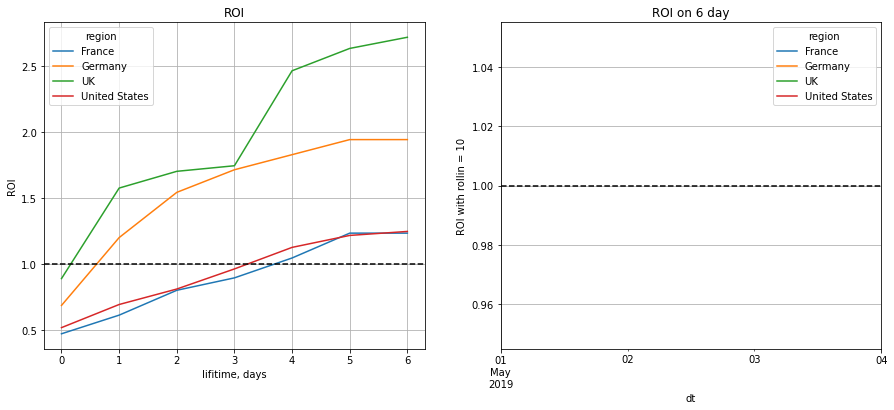

In [39]:
obeservation_date = datetime(2019, 6, 20).date()
horizon_days = 7

plot_roi(visits,
            costs,
            orders,
            obeservation_date,
            horizon_days,
            window=10,
            dims=['region'])


### Блок создания фунций для обработки и визулиазации данных подготовен

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [40]:
profile_task = get_profiles(visits, orders)
profile_task
for i in ['region','device','channel']:
    data = profile_task[i].unique()
    n = profile_task[i].nunique()
    print(f'В базе представленны данные по {n} {i}: {data}', '\n')
print('Общее количество зарегистрированных пользователей:',profile_task['user_id'].nunique())
print('Минимальная дата привлечения: ', profile_task['dt'].min())
print('Максимальная дата привлечения: ', profile_task['dt'].max())
print('Период отчёта:', visits['session_start'].min(),'-', visits['session_start'].max())

В базе представленны данные по 4 region: ['United States' 'France' 'Germany' 'UK'] 

В базе представленны данные по 4 device: ['Mac' 'iPhone' 'PC' 'Android'] 

В базе представленны данные по 11 channel: ['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds'] 

Общее количество зарегистрированных пользователей: 150008
Минимальная дата привлечения:  2019-05-01
Максимальная дата привлечения:  2019-10-27
Период отчёта: 2019-05-01 00:00:41 - 2019-10-31 23:59:23


**Вывод**

 В базе представленны данные:
- по 4 region: ['United States' 'France' 'Germany' 'UK'] 
-  по 4 device: ['Mac' 'iPhone' 'PC' 'Android'] 
- по 11 channel: ['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds'] 

- Общее количество зарегистрированных пользователей:  150008
- Период отчёта: 2019-05-01 00:00:41 - 2019-10-31 23:59:23
- Минимальная дата привлечения:  2019-05-01
- Максимальная дата привлечения:  2019-10-27

- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.
- Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [41]:
profile_task

,user_id,first_ts,region,device,channel,dt,month,payer
0,599326,2019-05-07 20:58:57,United States,Mac,FaceBoom,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,United States,iPhone,FaceBoom,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,France,iPhone,organic,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,Germany,PC,AdNonSense,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,United States,iPhone,YRabbit,2019-10-02,2019-10-01,False
...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,United States,iPhone,TipTop,2019-09-28,2019-09-01,False
150004,999975439887,2019-10-21 00:35:17,UK,PC,organic,2019-10-21,2019-10-01,False
150005,999976332130,2019-07-23 02:57:06,United States,iPhone,TipTop,2019-07-23,2019-07-01,False
150006,999979924135,2019-09-28 21:28:09,United States,PC,MediaTornado,2019-09-28,2019-09-01,False


In [42]:
regions = profile_task.groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id',ascending=False)
regions['share'] = round(regions['user_id']/regions['user_id'].sum(),2)
regions

,user_id,share
region,,
United States,100002,0.67
UK,17575,0.12
France,17450,0.12
Germany,14981,0.10


In [43]:
#доли платящих страны по количеству платящих пользователей
regions_p = profile_task.query('payer==True').groupby('region').agg({'user_id':'nunique'}).sort_values(by='user_id',ascending=False)
regions_p['share'] = round(regions_p['user_id']/regions_p['user_id'].sum(),2)
regions_p

,user_id,share
region,,
United States,6902,0.78
UK,700,0.08
France,663,0.07
Germany,616,0.07


In [44]:
# доля платящих в разбивке по регионам
display(profile_task.groupby('region').agg({'user_id':'nunique','payer':'mean'})\
                            .sort_values(by='user_id', ascending=False)\
                            .rename(columns={'payer':'Доля платящих пользователей'}))
print('Payers share among all useres:',   profile_task['payer'].mean())

,user_id,Доля платящих пользователей
region,,
United States,100002,0.069019
UK,17575,0.039829
France,17450,0.037994
Germany,14981,0.041119


Payers share among all useres: 0.05920350914617887


- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [45]:
users = profile_task.groupby('device').agg(total_users=('user_id','nunique')).sort_values(by='total_users',ascending=False)
users['share'] = round(users['total_users']/users['total_users'].sum(),2)
users

,total_users,share
device,,
iPhone,54479,0.36
Android,35032,0.23
PC,30455,0.20
Mac,30042,0.20


In [46]:
payers = profile_task.query('payer==True').groupby('device')\
                                 .agg({'user_id':'nunique'})\
                                 .sort_values(by='user_id',ascending=False)
payers['share'] = round(payers['user_id']/payers['user_id'].sum(),2)
payers

,user_id,share
device,,
iPhone,3382,0.38
Android,2050,0.23
Mac,1912,0.22
PC,1537,0.17


**Вывод**
- среди всех пользователей самую большую долю занимает США = 67%, остальные регионы примерно сопоставимы по доле 12-10%
- среди платящих пользователей на США приходиться 78% пользователей
- больше всего пользователей захадят с устройства iPhone - 36%, затем идет Android - 23%
- на пользователей мобильных платформ в сумме приходиться 60% от весех пользователей
- платящие пользователи составляют 6% от всех пользователей
- платящие пользователи больше всего используют iPhone - 38% и реже всего с PC - 17%
- по долям платящих пользователей США на 1 месте с 7% ,на втором месте Германия с 4%

- Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [47]:
profile_task.groupby('device').agg({'user_id':'nunique','payer':'mean'})\
                     .sort_values(by='user_id',ascending=False)\
                     .rename(columns={'user_id':'К-во пользователей', 'payer':'Доля платящих'})

,К-во пользователей,Доля платящих
device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


**Вывод**
- больше всего пользователей используют iPhone
- самая высокая доля платящих у тех, кто использует Mac

- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.
- Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [48]:
profile_task.groupby('channel').agg({'user_id':'nunique','payer':'mean'})\
                               .sort_values(by='user_id', ascending=False)\
                               .rename(columns={'user_id':'к-во пользователей', 'payer':'доля платящих'})

,к-во пользователей,доля платящих
channel,,
organic,56439,0.020553
FaceBoom,29144,0.122049
TipTop,19561,0.096007
OppleCreativeMedia,8605,0.027077
LeapBob,8553,0.030633
WahooNetBanner,8553,0.052964
RocketSuperAds,4448,0.079137
MediaTornado,4364,0.035747
YRabbit,4312,0.038265


In [49]:
# разбивка рекламных каналов по регионам
profile_task.pivot_table(index='channel', columns='region', values='user_id', aggfunc='nunique').fillna(0).\
                                                         sort_values(by='United States',ascending=False)

region,France,Germany,UK,United States
channel,,,,
organic,6392.0,5453.0,6421.0,38173.0
FaceBoom,0.0,0.0,0.0,29144.0
TipTop,0.0,0.0,0.0,19561.0
RocketSuperAds,0.0,0.0,0.0,4448.0
MediaTornado,0.0,0.0,0.0,4364.0
YRabbit,0.0,0.0,0.0,4312.0
AdNonSense,1366.0,1219.0,1295.0,0.0
LeapBob,2988.0,2519.0,3046.0,0.0
OppleCreativeMedia,2991.0,2562.0,3052.0,0.0


**Вывод**
- больше всего пользователей приходят из органического поиска, но среди них очень мало платящих - всего 2%
- из рекламных каналов самый большой трафик даёт FaceBoom как по количеству пользователей, так и по доле платящих
- набор рекламных площадок в США и других регионах не пересекается. В США это 5 площадок 1 место FaceBoom, 2 место TipTop
- в других регионах это тоже 5 каналов. Лидер во Франции-LeapBob, Германии - WhahooNetBanner, Великобритани-OppleCreateveMedia


In [50]:
#profile_task

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

- Посчитайте общую сумму расходов на маркетинг.

In [51]:
print('Общие затраты на рекламу:', round(costs['costs'].sum(),2))

Общие затраты на рекламу: 105497.3


In [52]:
# распределение рекламных расходов по странам и каналам
cac = profiles_cac(visits, costs, orders)
expenses = cac.groupby(['user_id','region','channel']).agg({'acquisition_costs':'mean'})
#expenses.groupby(['region','channel']).agg({'acquisition_costs':'sum'})
expenses = expenses.pivot_table(index='channel', columns='region', values='acquisition_costs', aggfunc='sum').fillna(0)
expenses.loc['total'] = expenses.sum()
expenses = expenses.sort_values(by='United States', ascending=False)
expenses['Total'] = expenses.sum(axis=1)
expenses

region,France,Germany,UK,United States,Total
channel,,,,,
total,5075.973946,4424.223235,5068.502819,90928.60,105497.30
TipTop,0.000000,0.000000,0.000000,54751.30,54751.30
FaceBoom,0.000000,0.000000,0.000000,32445.60,32445.60
RocketSuperAds,0.000000,0.000000,0.000000,1833.00,1833.00
MediaTornado,0.000000,0.000000,0.000000,954.48,954.48
YRabbit,0.000000,0.000000,0.000000,944.22,944.22
AdNonSense,1376.316788,1229.282545,1305.650668,0.00,3911.25
LeapBob,628.045578,529.946557,639.607864,0.00,1797.60
OppleCreativeMedia,747.336327,640.733464,763.180209,0.00,2151.25


In [53]:
# доля рекламных расходов по странам
for i in expenses.columns:
    print(f'Share of markentg expenses for {i} is', round(expenses.loc['total',i]/expenses.loc['total','Total'],2),'\n')

Share of markentg expenses for France is 0.05 

Share of markentg expenses for Germany is 0.04 

Share of markentg expenses for UK is 0.05 

Share of markentg expenses for United States is 0.86 

Share of markentg expenses for Total is 1.0 



- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [54]:
spendings = costs.groupby('channel').agg({'costs':'sum'})
spendings['share'] = round(spendings['costs']/spendings['costs'].sum(),2)
spendings.sort_values(by='share',ascending=False)

,costs,share
channel,,
TipTop,54751.30,0.52
FaceBoom,32445.60,0.31
WahooNetBanner,5151.00,0.05
AdNonSense,3911.25,0.04
LeapBob,1797.60,0.02
OppleCreativeMedia,2151.25,0.02
RocketSuperAds,1833.00,0.02
MediaTornado,954.48,0.01
YRabbit,944.22,0.01


**Вывод**
- Общие затраты на рекламу составили: 105497.3
- самые большие вложения на рекламу в канал TipTop - не него пришлось 52% от всех расходов и это все в регионе США
- на втором месте FaceBoom c 31%, тоже США
- на первые два канала из 10 пришлось 83% от всех затрат
- самые большие расходы на рекламу пришлись на регион США c долей 86%, в остальных странах примерно сопоставимо по 4-5%
- в остальных регионах на первом месте по расходам WahooNetBanneer, а затем AdNonSense

- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Постарайтесь отразить это на одном графике.

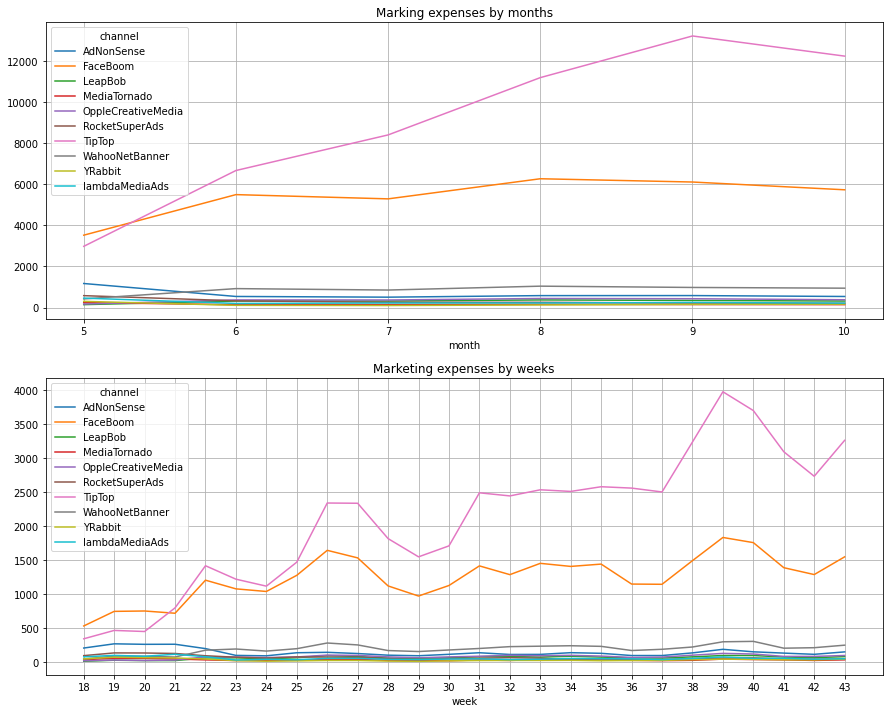

In [55]:
ads = costs
ads['month'] = ads['dt'].dt.month
ads['week'] = ads['dt'].dt.isocalendar().week
plt.figure(figsize=(15,12))
ax1 = plt.subplot(2,1,1)
ads.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax1)
plt.title('Marking expenses by months')

ax2 = plt.subplot(2,1,2)
ads.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax2)
plt.xticks(list(ads['week'].unique()))
plt.title('Marketing expenses by weeks')

plt.show()

**Вывод**
- самые большие вложения на рекламу были в сентября на 39 неделе
- больше всего рекламных расходов было по каналу TipTop

- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
- Используйте профили пользователей.

In [56]:
result = profiles_cac(visits, costs, orders)
result.groupby('channel').agg({'acquisition_costs':'mean'}).sort_values(by='acquisition_costs', ascending=False)

,acquisition_costs
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


<div class="alert alert-info">
    <b>🎓 Комментарий студента:</b> 
        Спасибо! Внес исправление, код работает.</div>

**Вывод**
- самая высокая стоимость привлечения была на канале TipTop - средняя стоимость - 2.8 что более чем 2 раза выше, чем у следующего канала
- на втором месте FaceBoom - 1.11 

### Оцениниваем  окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

- Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы.
- Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.
- Необходимость включения в анализ органических пользователей определите самостоятельно.

In [59]:
observation_date = datetime(2019,11,1).date() # задаем момент анализа
horizon_days = 14 # задаем горизонт анализа
profiles = profiles_cac(visits, costs, orders)

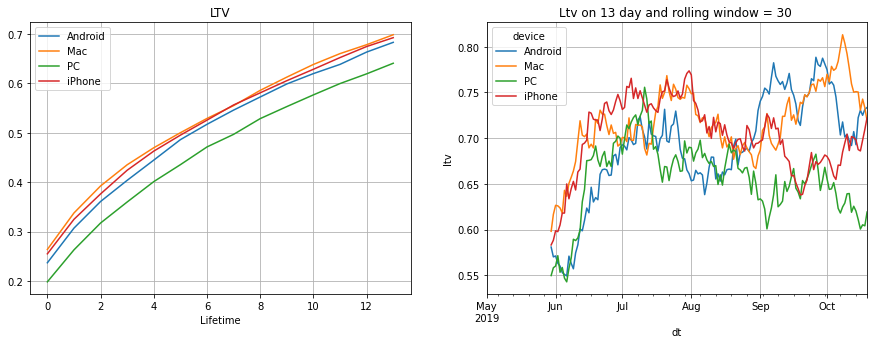

In [60]:
plot_ltv(profiles,\
         orders, \
         observation_date,\
         horizon_days,\
         dimensions=['device'],\
         window=30,
         ignore_horizon=False)

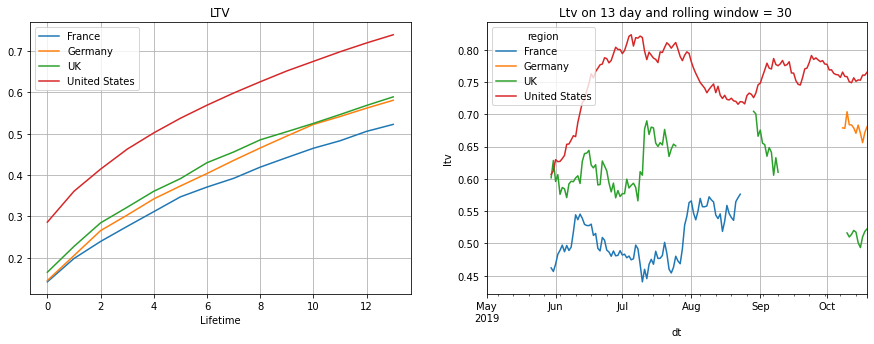

In [61]:
plot_ltv(profiles,\
         orders, \
         observation_date,\
         horizon_days,\
         dimensions=['region'],\
         window=30,\
         ignore_horizon=False)

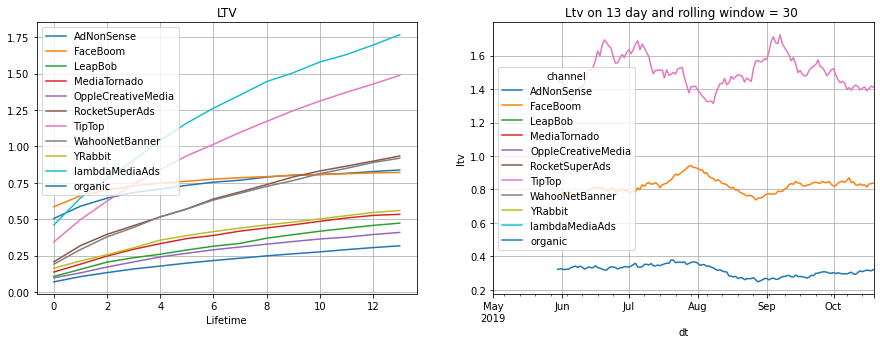

In [62]:
# разбивка по каналам
plot_ltv(profiles,\
        orders,\
        observation_date,\
        horizon_days,\
        dimensions=['channel'],\
        window=30,\
        ignore_horizon=False)

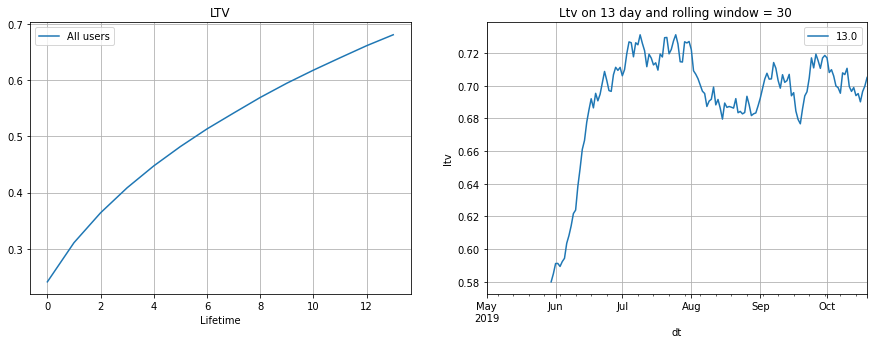

In [63]:
# LTV в целом
plot_ltv(profiles,\
        orders,\
        observation_date,\
        horizon_days,\
        dimensions=[],\
        window=30,\
        ignore_horizon=False)

**LTV**
 - LTV последнего дня анализа неравномерна в течении года: в начале кампании растет с пиком в  июле, со спадом в конце августа- сентябре и небольшими повторным подъёмом в октябре
 - из рекламных каналов в целом по году лучшие показатели LTV у LambdaMedia и TipTop, на третьем месте WahooNetBanner и RocketSuperAds
 - Лучшие показатель у пользователей  iPhone и Mac
 - Самый высокий уровень LTV в США, наименьший во Франции

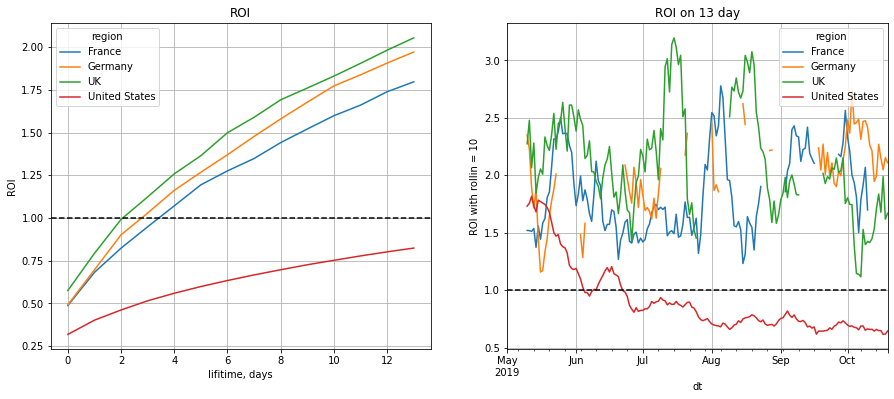

In [61]:
#  ROI по регионам
plot_roi(visits,
            costs,
            orders,
            obeservation_date,
            horizon_days,
            window=10,# окно сглаживания
            dims=['region'])

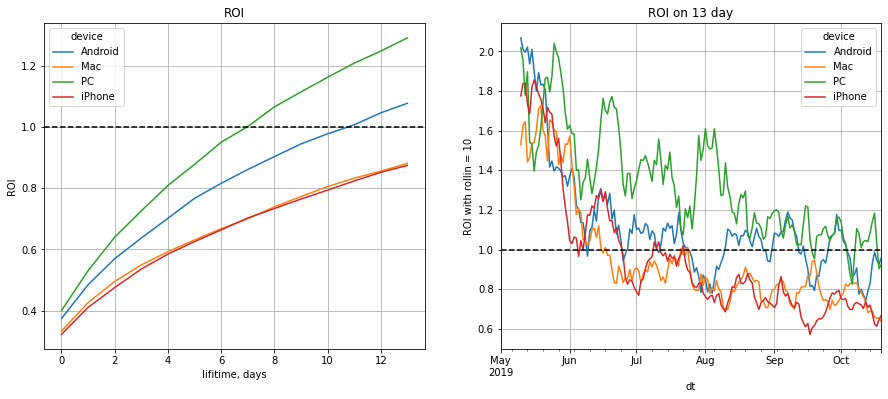

In [62]:
#  ROI по устройствам
plot_roi(visits,
            costs,
            orders,
            obeservation_date,
            horizon_days,
            window=10,# окно сглаживания
            dims=['device'])

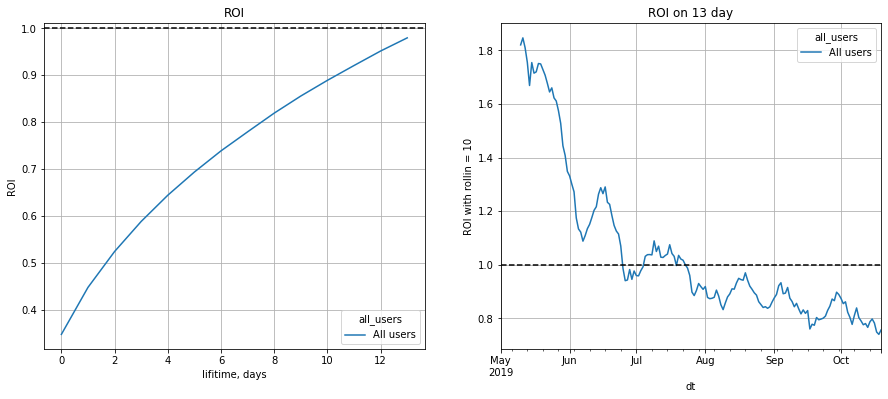

In [63]:
# общий ROI
plot_roi(visits,
            costs,
            orders,
            obeservation_date,
            horizon_days,
            window=10,# окно сглаживания
            dims=[])

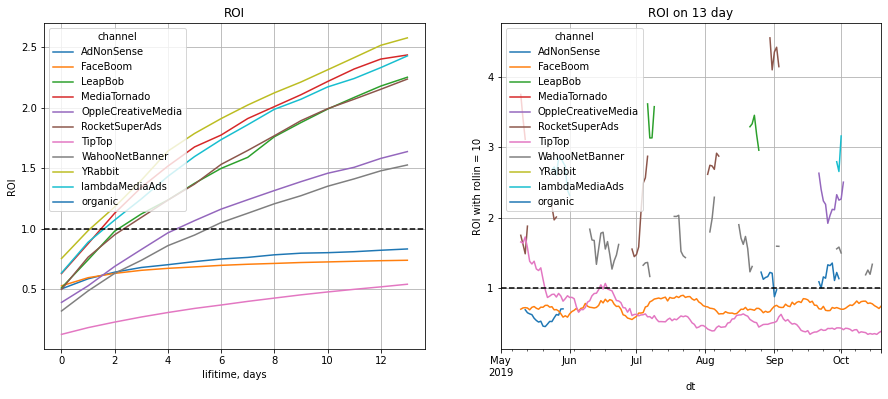

In [64]:
# общий ROI
plot_roi(visits,
            costs,
            orders,
            obeservation_date,
            horizon_days,
            window=10,# окно сглаживания
            dims=['channel'])

**ROI**
- По всем регионам, кроме США, ROI преодолевает порог безубыточности примерно с третьего дня.
- В США так и не достигаем порогового уровня даже к концу второй недели. 
- Налучшие результаты в Великобритании и Германии
- При анализа ROI в зависмости от даты вовлечения в США, начиная с июня, показатель остается ниже порогового уровня
- По осталным странам есть колебания, но на всем протяжении исследования ROI выше порогового уровня
- При анализе устройств только пользователи на Android и PC смогли преодолеть точку безубыточности
- При этом со временем ROI снижается для пользователей всех устройств и концу наблюдения у всух падает ниже порога.
- Общий ROI непрерывно снижается и упал ниже точки безубыточности в конце июля.
- реклама на каналах TipTop FaceBoom не окупается 
- максимальная отдача от размещения на канале YRabbit
- также в число лидеров по окупаемости рекламы входят MediaTornado,lambdaMediaAds, LeapBob RocketSuperAds

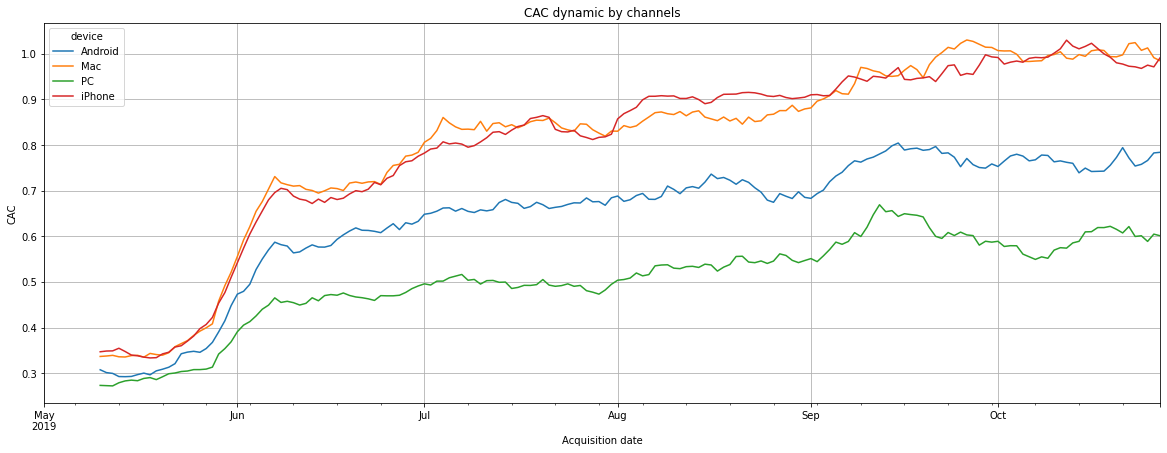

In [65]:
plot_cac(visits, costs, orders, window=10, dimensions=['device'])

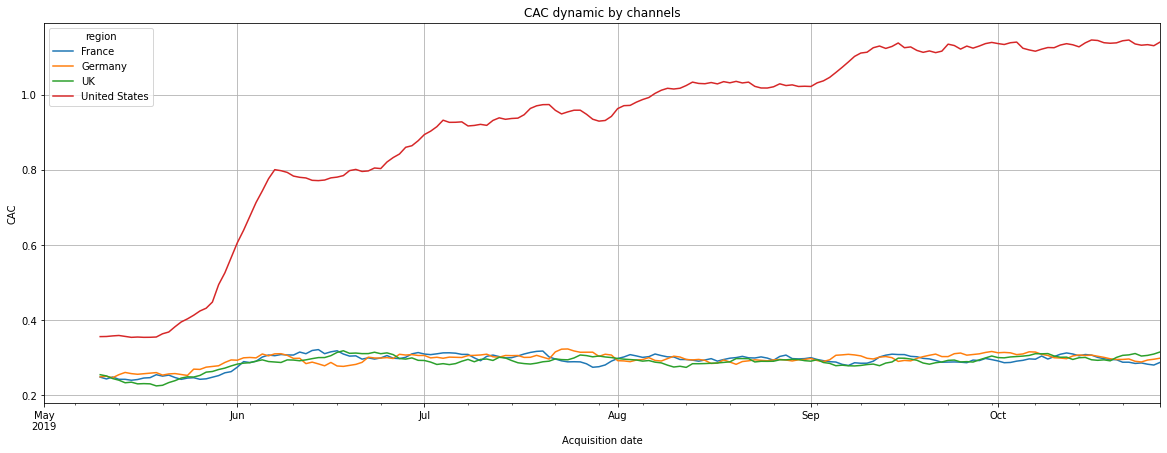

In [66]:
plot_cac(visits, costs, orders, window=10, dimensions=['region'])

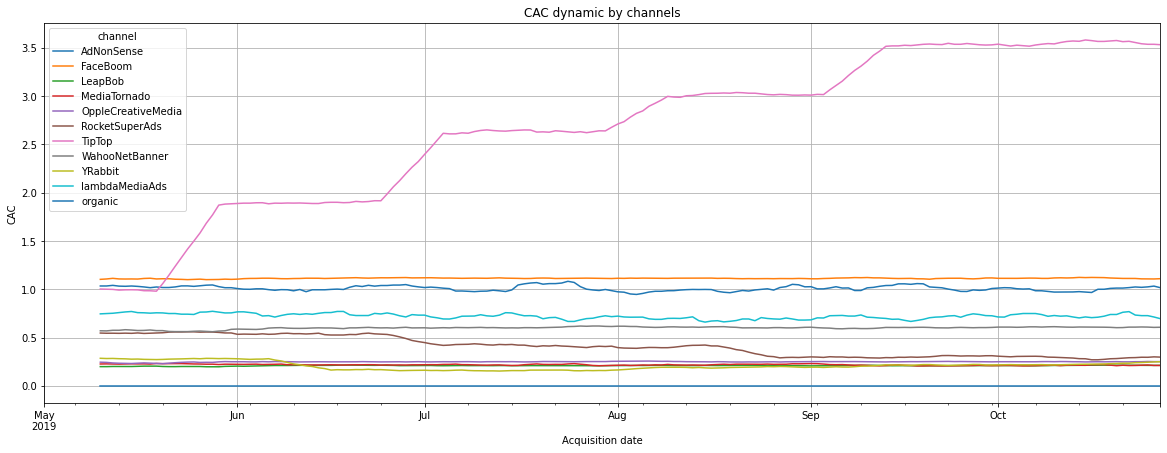

In [67]:
plot_cac(visits, costs, orders, window=10, dimensions=['channel'])

**CAC**
- стоимость привлечения клиента растет для всех типов устройств, главным образом за счет пользователей из США
- дороже всего обходятся пользователи iPhone и Mac
- привлечение пользователей из США в разы дороже чем в других регионах и постоянно растет
- из рекламных каналов самое дорогое привлечение у TipTop

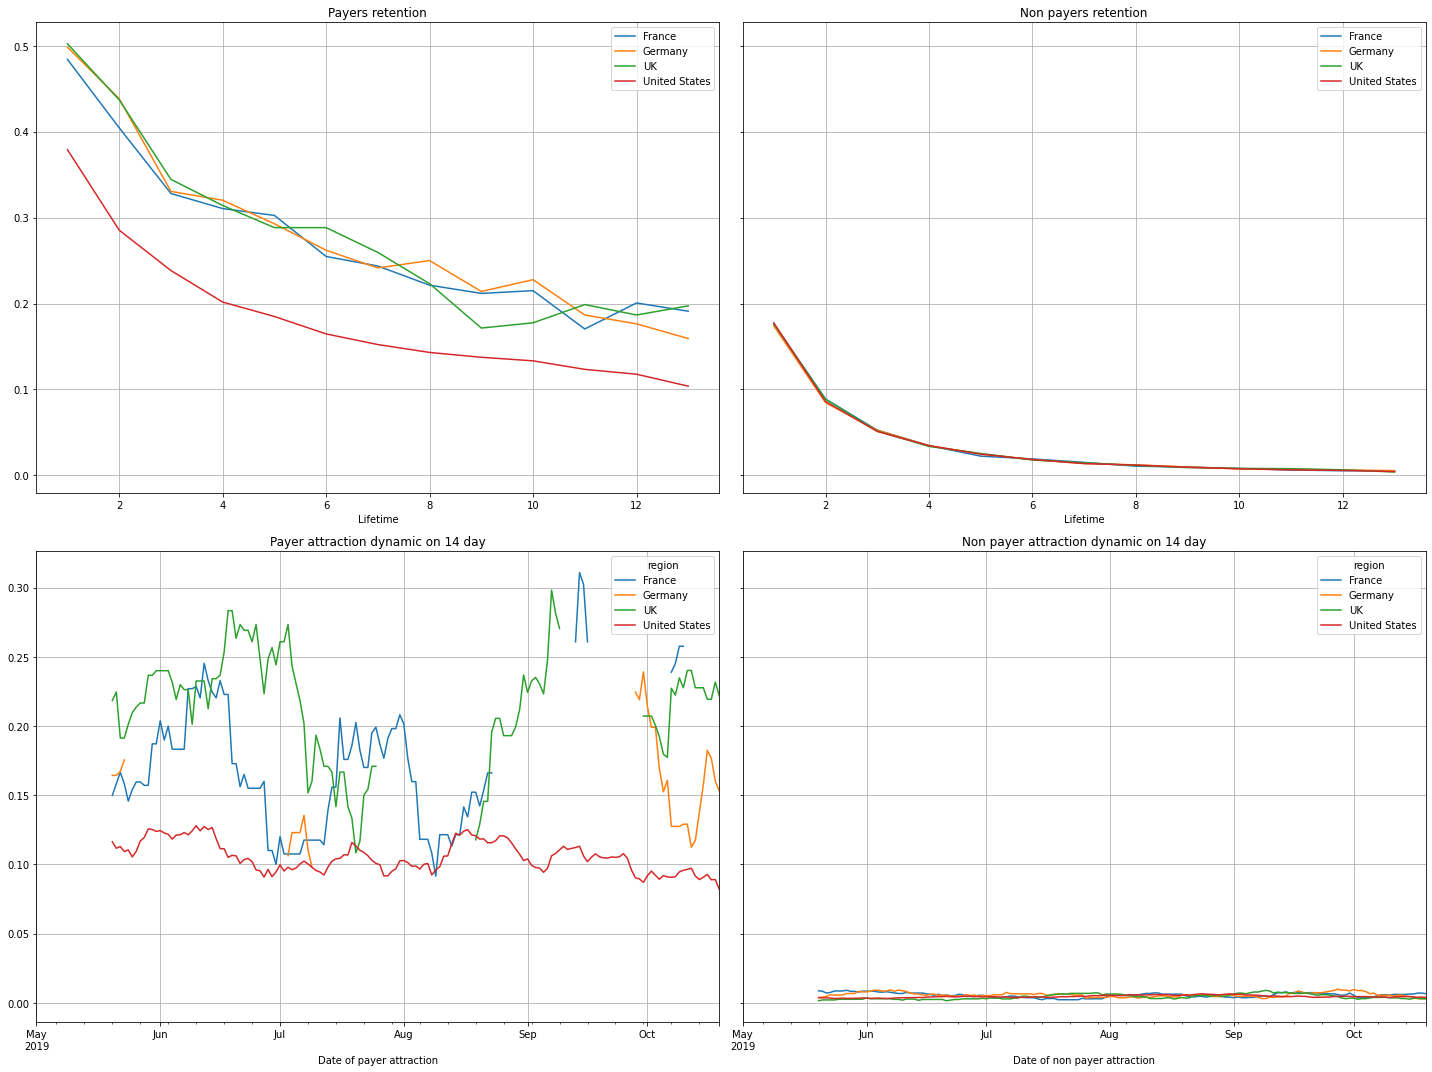

In [68]:
# retention по регионам
result_raw, retention, retention_in_time = get_retention(profiles, \
                                                         visits,\
                                                         observation_date,\
                                                         horizon_days,\
                                                         dimensions=['region'])

plot_retention(retention, retention_in_time, horizon_days, window=20)

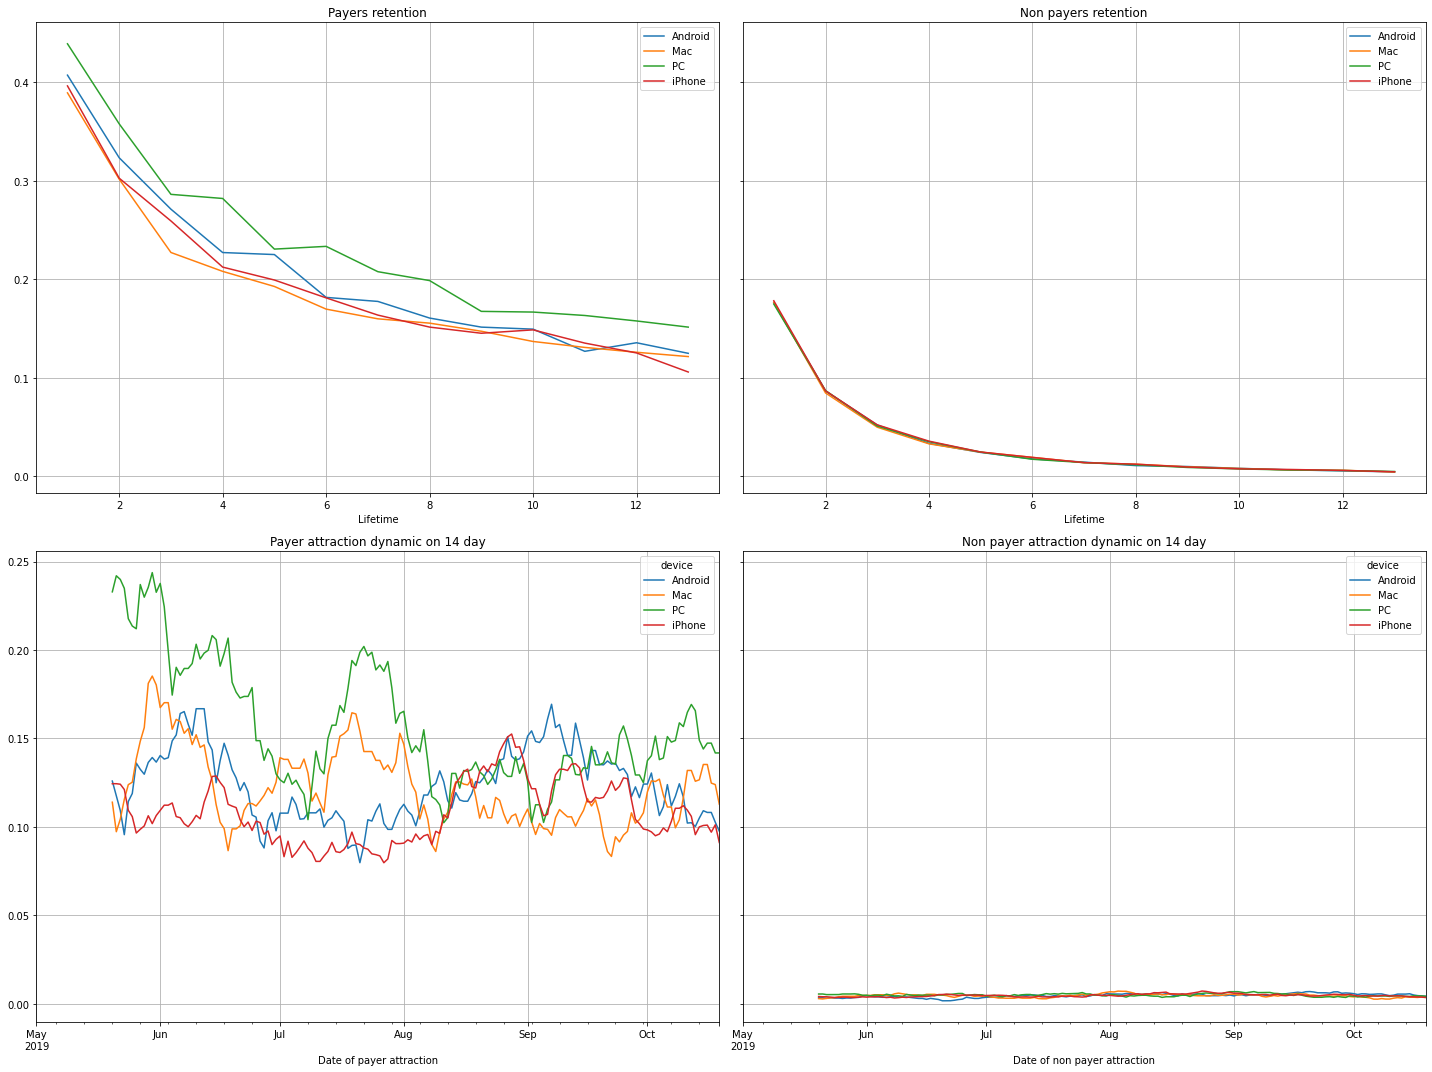

In [69]:
# retention по устройствам
result_raw, retention, retention_in_time = get_retention(profiles, \
                                                         visits,\
                                                         observation_date,\
                                                         horizon_days,\
                                                         dimensions=['device'])

plot_retention(retention, retention_in_time, horizon_days, window=20)

**Retention rate**
- лучший показатель по удержанию у пользователей PC
- со временем этот показатель падает для всех устройств
- самый низкий уровень удержаниясреди платящих пользователей  в США
- остальные регионы отностильно близки друг к другу
- удеражение у неплатящих пользователей крайне низкое - близкое к нулю

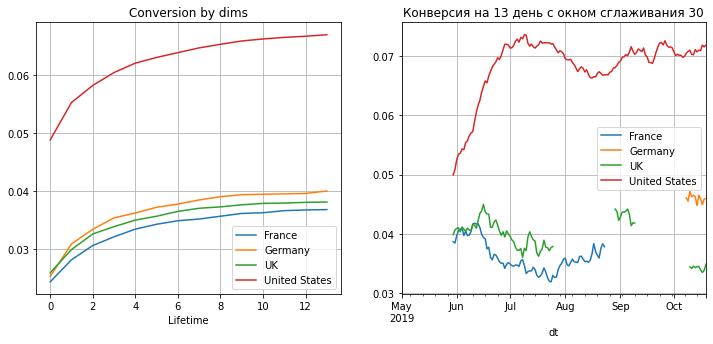

In [70]:
# конверсия по регионам
plot_conversion(profiles,\
                    orders,\
                    observation_date,\
                    horizon_days,\
                    dimensions=['region'],\
                    window=30,\
                    ignore_horizon=False)

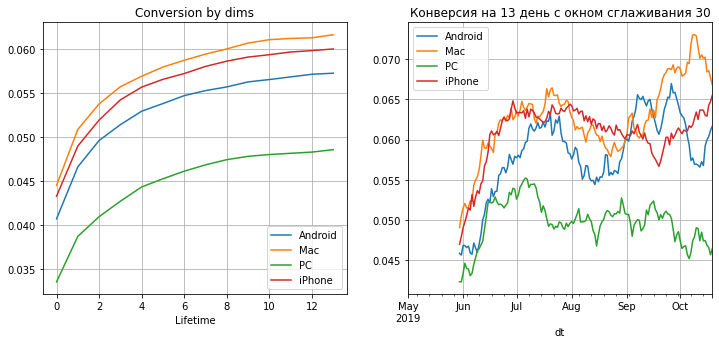

In [71]:
# конверсия по устройствам
plot_conversion(profiles,\
                    orders,\
                    observation_date,\
                    horizon_days,\
                    dimensions=['device'],\
                    window=30,\
                    ignore_horizon=False)

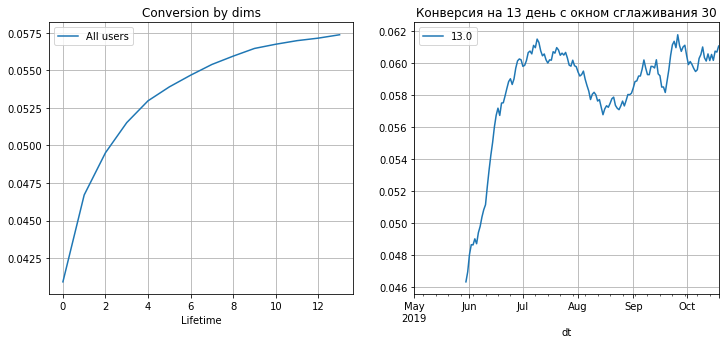

In [72]:
# конверсия по всем пользователям
plot_conversion(profiles,\
                    orders,\
                    observation_date,\
                    horizon_days,\
                    dimensions=[],\
                    window=30,\
                    ignore_horizon=False)

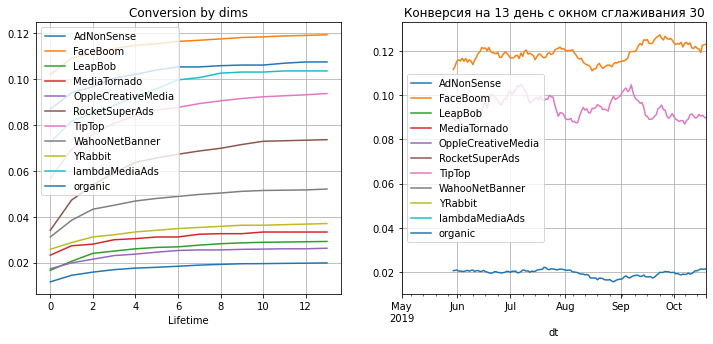

In [73]:
# конверсия по всем пользователям
plot_conversion(profiles,\
                    orders,\
                    observation_date,\
                    horizon_days,\
                    dimensions=['channel'],\
                    window=30,\
                    ignore_horizon=False)

**Conversion rate**
- лучший показатель конверсии у пользователей Mac и iPhone
- при этом с течением времени конверсия у PC снизилась, у остальных устройств несколько увеличилась
- самый высокий уровень конверсии  в США, самый низкий во Франции
- остальные регионы отностильно близки друг к другу
- в целом конверсия после значительного роста в июле остается стабильной
- из рекламных каналов лучшую конверсию дают TipTop и Faceboom

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

## Заключение

**Общая информация**

Проведен анализ пользовательской активности и результатов рекламной поддержки на основании следующих данных:
1. Данные по активностям клиениентов за 6 месяцев с 1 мая до 31 октября 2019 года
   с разбивкой по:
- 3 регионам: United States UK France Germany
- 11 каналам: organic TipTop RocketSuperAds YRabbit FaceBoom MediaTornado AdNonSense LeapBob WahooNetBanner OppleCreativeMedia lambdaMediaAds
- 3 типам платформ: iPhone Mac Android PC 
- Общее количество зарегистрированных пользователей:  150008
- Период отчёта: 2019-05-01 00:00:41 - 2019-10-31 23:59:23
- Минимальная дата привлечения:  2019-05-01
- Максимальная дата привлечения:  2019-10-27

2. Затраты на рекламу с разбивкой по каналам

3. Данные по доходу с разбивкой по клиентам
**Качество базы**

- Пропусков и дубликатов в предоставленных базах нет
- В сырых данных столбцы с датой и временем имеют тип данных object

**Обработка**

Для оптимизации обработки данных подготовленные следущиее фунции:

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_roi()` - для расчета ROI
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

## Результаты анализа

**Исследовательский анализ данных**

Профили пользователей
- среди всех пользователей самую большую долю занимает США - 67%, остальные регионы примерно сопоставимы по доле 12-10%
- среди платящих пользователей на США приходиться 78% пользователей
- больше всего пользователей захадят с устройства iPhone - 36%, затем идет Android - 23%
- на пользователей мобильных платформ в сумме приходиться 60% от весех пользователей
- платящие пользователи составляют 6% от всех пользователей
- платящие пользователи больше всего используют iPhone - 38% и реже всего с PC - 17%
- по долям платящих пользователей США на 1 месте с 7%, на втором месте Германия с 4%

**Рекламные каналы**
- больше всего пользователей приходят из органического поиска, но среди них очень мало платящих - всего 2%
- из рекламных каналов самый большой трафик даёт FaceBoom как по количеству пользователей, так и по доле платящих
- набор рекламных площадок в США и других регионах не пересекается. В США это 5 площадок 1 место FaceBoom, 2 место TipTop
- в других регионах это тоже 5 каналов. Лидер во Франции-LeapBob, Германии - WhahooNetBanner, Великобритании-OppleCreateveMedia

**Маркетинг**
- Общие затраты на рекламу составили: 105497.3
- самые большие вложения на рекламу в канал TipTop - не него пришлось 52% от всех расходов и это все в регионе США
- на втором месте FaceBoom c 31%, тоже США
- на первые два канала из 10 пришлось 83% от всех затрат
- самые большие расходы на рекламу пришлись на регион США c долей 86%, в остальных странах примерно сопоставимо по 4-5%
- в остальных регионах на первом месте по расходам WahooNetBanneer, а затем AdNonSense
- самые большие вложения на рекламу были в сентябре на 39 неделе
- самая высокая стоимость привлечения была на канале TipTop - средняя стоимость - 2.8 что более чем 2 раза выше, чем у следующего канала на втором месте FaceBoom - 1.11

LTV
 - LTV последнего дня анализа неравномерна в течении года: в начале кампании растет с пиком в  июле, со спадом в конце августа- сентябре и небольшими повторным подъёмом в октябре
 - из рекламных каналов в целом по году лучшие показатели LTV у LambdaMedia и TipTop, на третьем месте WahooNetBanner и RocketSuperAds
 - Лучшие показатель у пользователей  iPhone и Mac
 - Самый высокий уровень LTV в США, наименьший во Франции
 
ROI
 
- По всем регионам, кроме США, ROI преодолевает порог безубыточности примерно с третьего дня.
- В США так и не достигаем порогового уровня даже к концу второй недели. 
- Налучшие результаты в Великобритании и Германии
- При анализа ROI в зависмости от даты вовлечения в США, начиная с июня, показатель остается ниже порогового уровня
- По осталным странам есть колебания, но на всем протяжении исследования ROI выше порогового уровня
- При анализе устройств только пользователи на Android и PC смогли преодолеть точку безубыточности
- При этом со временем ROI снижается для пользователей всех устройств и концу наблюдения у всух падает ниже порога.
- Общий ROI непрерывно снижается и упал ниже точки безубыточности в конце июля.
- реклама на каналах TipTop FaceBoom не окупается 
- максимальная отдача от размещения на канале YRabbit
- также в число лидеров по окупаемости рекламы входят MediaTornado,lambdaMediaAds, LeapBob RocketSuperAds

CAC
- стоимость привлечения клиента растет для всех типов устройств, главным образом за счет пользователей из США
- дороже всего обходятся пользователи iPhone и Mac
- привлечение пользователей из США в разы дороже чем в других регионах и постоянно растет
- из рекламных каналов самое дорогое привлечение у TipTop

Retention rate
- лучший показатель по удержанию у пользователей PC
- со временем этот показатель падает для всех устройств
- самый низкий уровень удержания среди платящих пользователей  в США
- остальные регионы отностильно близки друг к другу
- удеражение у неплатящих пользователей крайне низкое - близкое к нулю

Conversion rate
- лучший показатель конверсии у пользователей Mac и iPhone
- при этом с течением времени конверсия у PC снизилась, у остальных устройств несколько увеличилась
- самый высокий уровень конверсии  в США, самый низкий во Франции
- остальные регионы относительно близки друг к другу
- в целом конверсия после значительного роста в июле остается стабильной
- из рекламных каналов лучшую конверсию дают TipTop и Faceboom

**Рекомедации для отдела маркетинга:**

- США самый большой регион по количеству и доле платящих пользователей и рекламным затратам. 
При этом рекламные затраты не окупаются, за в первую очередь для пользователей, привлеченных через TipTop и FaceBoom.
В остальных регионах  ROI более 1 
- за счет потерь в США расходы на рекламу в целом по компании не окупаются. ROI неуклонно снижается на всем протяжении наблюдения.

Целесообразно пересмотреть стратегию размещения рекламы в регионе США с учетом указанных данных:
- в США возможно перераспределить маркетинговый бюджет с каналов TipTop FaceBoom на другие каналы: YRabbit MediaTornado
- в других регионах лучшие показатели по ROI у LeapBob, lambdaMediaAds, возможно их долю в бюджете также нужно увеличить
